In [0]:
df = spark.read.format("bigquery").option("viewsEnabled","true").option("materializationDataset","spark_materialization").option("materializationProject","wmt-fin-fcp-uat-ds").option("project","wmt-fin-fcp-dev").option("parentProject","wmt-fin-fcp-dev").option('table',str("wmt_us_fcp_trc_pnl.Waggle_POC1")).load()
df.registerTempTable("Waggle_POC")

data=sqlContext.sql("select DISTINCT FISCAL_YR_NBR,FISCAL_QTR_NBR, COUNT(*) as NUMRECS from Waggle_POC GROUP BY FISCAL_YR_NBR,FISCAL_QTR_NBR ORDER BY FISCAL_YR_NBR,FISCAL_QTR_NBR")
display(data)

FISCAL_YR_NBR,FISCAL_QTR_NBR,NUMRECS
2020,3,4
2021,1,9084
2021,2,11666
2021,3,9082
2021,4,9031
2022,1,8510
2022,2,9129
2022,3,9717
2022,4,9256


In [0]:
# data=sqlContext.sql("select * from Waggle_POC")
data=sqlContext.sql("select * from Waggle_POC WHERE FISCAL_QTR_NBR=3 AND USD_AMT >0 AND DEPT_NBR IS NOT NULL")
# data=sqlContext.sql("select * from Waggle_POC WHERE USD_AMT >0 AND DEPT_NBR IS NOT NULL")
display(data)

FISCAL_YR_NBR,FISCAL_QTR_NBR,FISCAL_PERIOD_NBR,WM_WK_NBR,REGION_NBR,STORE_NBR,DEPT_NBR,ACCTG_DEPT_NBR,USD_AMT,YEAR,PA_NUS_PRVT_PP,PA_NUS_PPPC_RF,PA_NUS_PPP,PA_NUS_ATLS,NY_TTF_GNFS_KN,NY_TRF_NCTR_KN,NY_TRF_NCTR_CN,NY_TRF_NCTR_CD,NY_TAX_NIND_KN,NY_TAX_NIND_CN,NY_TAX_NIND_CD,NY_GSR_NFCY_KN,NY_GSR_NFCY_CN,NY_GSR_NFCY_CD,NY_GNS_ICTR_ZS,NY_GNS_ICTR_GN_ZS,NY_GNS_ICTR_CN,NY_GNS_ICTR_CD,NY_GNP_PCAP_PP_KD,NY_GNP_PCAP_PP_CD,NY_GNP_PCAP_KN,NY_GNP_PCAP_KD_ZG,NY_GNP_PCAP_KD,NY_GNP_PCAP_CN,NY_GNP_PCAP_CD,NY_GNP_MKTP_PP_KD,NY_GNP_MKTP_PP_CD,NY_GNP_MKTP_KN,NY_GNP_MKTP_KD_ZG,NY_GNP_MKTP_KD,NY_GNP_MKTP_CN_AD,NY_GNP_MKTP_CN,NY_GNP_MKTP_CD,NY_GNP_ATLS_CD,NY_GDY_TOTL_KN,NY_GDS_TOTL_ZS,NY_GDS_TOTL_CN,NY_GDS_TOTL_CD,NY_GDP_PCAP_PP_KD,NY_GDP_PCAP_PP_CD,NY_GDP_PCAP_KN,NY_GDP_PCAP_KD_ZG,NY_GDP_PCAP_KD,NY_GDP_PCAP_CN,NY_GDP_PCAP_CD,NY_GDP_MKTP_PP_KD,NY_GDP_MKTP_PP_CD,NY_GDP_MKTP_KN,NY_GDP_MKTP_KD_ZG,NY_GDP_MKTP_KD,NY_GDP_MKTP_CN_AD,NY_GDP_MKTP_CN,NY_GDP_MKTP_CD,NY_GDP_FCST_KN,NY_GDP_FCST_KD,NY_GDP_FCST_CN,NY_GDP_FCST_CD,NY_GDP_DISC_KN,NY_GDP_DISC_CN,NY_GDP_DEFL_ZS,NY_GDP_DEFL_KD_ZG,NY_EXP_CAPM_KN,NY_ADJ_SVNX_GN_ZS,NY_ADJ_SVNX_CD,NY_ADJ_SVNG_GN_ZS,NY_ADJ_SVNG_CD,NY_ADJ_NNTY_PC_KD_ZG,NY_ADJ_NNTY_PC_KD,NY_ADJ_NNTY_PC_CD,NY_ADJ_NNTY_KD_ZG,NY_ADJ_NNTY_KD,NY_ADJ_NNTY_CD,NY_ADJ_NNAT_GN_ZS,NY_ADJ_NNAT_CD,NY_ADJ_ICTR_GN_ZS,NY_ADJ_DRES_GN_ZS,NY_ADJ_DPEM_GN_ZS,NY_ADJ_DPEM_CD,NY_ADJ_DNGY_GN_ZS,NY_ADJ_DNGY_CD,NY_ADJ_DMIN_GN_ZS,NY_ADJ_DMIN_CD,NY_ADJ_DKAP_GN_ZS,NY_ADJ_DKAP_CD,NY_ADJ_DFOR_GN_ZS,NY_ADJ_DFOR_CD,NY_ADJ_DCO2_GN_ZS,NY_ADJ_DCO2_CD,NY_ADJ_AEDU_GN_ZS,NY_ADJ_AEDU_CD,NV_SRV_TOTL_ZS,NV_SRV_TOTL_KN,NV_SRV_TOTL_KD_ZG,NV_SRV_TOTL_KD,NV_SRV_TOTL_CN,NV_SRV_TOTL_CD,NV_SRV_EMPL_KD,NV_MNF_TXTL_ZS_UN,NV_MNF_TECH_ZS_UN,NV_MNF_OTHR_ZS_UN,NV_MNF_MTRN_ZS_UN,NV_MNF_FBTO_ZS_UN,NV_MNF_CHEM_ZS_UN,NV_IND_TOTL_ZS,NV_IND_TOTL_KN,NV_IND_TOTL_KD_ZG,NV_IND_TOTL_KD,NV_IND_TOTL_CN,NV_IND_TOTL_CD,NV_IND_MANF_ZS,NV_IND_MANF_KN,NV_IND_MANF_KD_ZG,NV_IND_MANF_KD,NV_IND_MANF_CN,NV_IND_MANF_CD,NV_IND_EMPL_KD,NV_FSM_TOTL_KN,NV_FSM_TOTL_CN,NV_AGR_TOTL_ZS,NV_AGR_TOTL_KN,NV_AGR_TOTL_KD_ZG,NV_AGR_TOTL_KD,NV_AGR_TOTL_CN,NV_AGR_TOTL_CD,NV_AGR_EMPL_KD,NE_TRD_GNFS_ZS,NE_RSB_GNFS_ZS,NE_RSB_GNFS_KN,NE_RSB_GNFS_CN,NE_RSB_GNFS_CD,NE_IMP_GNFS_ZS,NE_IMP_GNFS_KN,NE_IMP_GNFS_KD_ZG,NE_IMP_GNFS_KD,NE_IMP_GNFS_CN,NE_IMP_GNFS_CD,NE_GDI_TOTL_ZS,NE_GDI_TOTL_KN,NE_GDI_TOTL_KD_ZG,NE_GDI_TOTL_KD,NE_GDI_TOTL_CN,NE_GDI_TOTL_CD,NE_GDI_STKB_KN,NE_GDI_STKB_CN,NE_GDI_STKB_CD,NE_GDI_FTOT_ZS,NE_GDI_FTOT_KN,NE_GDI_FTOT_KD_ZG,NE_GDI_FTOT_KD,NE_GDI_FTOT_CN,NE_GDI_FTOT_CD,NE_GDI_FPRV_ZS,NE_GDI_FPRV_CN,NE_EXP_GNFS_ZS,NE_EXP_GNFS_KN,NE_EXP_GNFS_KD_ZG,NE_EXP_GNFS_KD,NE_EXP_GNFS_CN,NE_EXP_GNFS_CD,NE_DAB_TOTL_ZS,NE_DAB_TOTL_KN,NE_DAB_TOTL_KD,NE_DAB_TOTL_CN,NE_DAB_TOTL_CD,NE_DAB_DEFL_ZS,NE_CON_TOTL_ZS,NE_CON_TOTL_KN,NE_CON_TOTL_KD_ZG,NE_CON_TOTL_KD,NE_CON_TOTL_CN,NE_CON_TOTL_CD,NE_CON_PRVT_ZS,NE_CON_PRVT_PP_KD,NE_CON_PRVT_PP_CD,NE_CON_PRVT_PC_KD_ZG,NE_CON_PRVT_PC_KD,NE_CON_PRVT_KN,NE_CON_PRVT_KD_ZG,NE_CON_PRVT_KD,NE_CON_PRVT_CN_AD,NE_CON_PRVT_CN,NE_CON_PRVT_CD,NE_CON_GOVT_ZS,NE_CON_GOVT_KN,NE_CON_GOVT_KD_ZG,NE_CON_GOVT_KD,NE_CON_GOVT_CN,NE_CON_GOVT_CD,GC_XPN_TOTL_GD_ZS,GC_REV_XGRT_GD_ZS,GC_DOD_TOTL_GD_ZS,FP_CPI_TOTL_ZG,FI_RES_XGLD_CD,FI_RES_TOTL_CD,DT_TDS_DECT_GN_ZS,DT_TDS_DECT_EX_ZS,DT_ODA_ODAT_PC_ZS,DT_ODA_ODAT_GN_ZS,DT_ODA_ODAT_CD,DT_DOD_PVLX_GN_ZS,DT_DOD_PVLX_EX_ZS,DT_DOD_PVLX_CD,DT_DOD_DSTC_XP_ZS,DT_DOD_DSTC_IR_ZS,DT_DOD_DECT_GN_ZS,DT_DOD_DECT_CD,BX_TRF_PWKR_DT_GD_ZS,BX_TRF_PWKR_CD_DT,BX_TRF_PWKR_CD,BX_TRF_CURR_CD,BX_PEF_TOTL_CD_WD,BX_KLT_DINV_WD_GD_ZS,BX_KLT_DINV_CD_WD,BX_GSR_TRVL_ZS,BX_GSR_TRAN_ZS,BX_GSR_TOTL_CD,BX_GSR_ROYL_CD,BX_GSR_NFSV_CD,BX_GSR_MRCH_CD,BX_GSR_INSF_ZS,BX_GSR_GNFS_CD,BX_GSR_FCTY_CD,BX_GSR_CMCP_ZS,BX_GSR_CCIS_ZS,BX_GSR_CCIS_CD,BX_GRT_TECH_CD_WD,BX_GRT_EXTA_CD_WD,BN_TRF_KOGT_CD,BN_TRF_CURR_CD,BN_RES_INCL_CD,BN_KLT_PTXL_CD,BN_KLT_DINV_CD,BN_KAC_EOMS_CD,BN_GSR_MRCH_CD,BN_GSR_GNFS_CD,BN_GSR_FCTY_CD,BN_FIN_TOTL_CD,BN_CAB_XOKA_GD_ZS,BN_CAB_XOKA_CD,BM_TRF_PWKR_CD_DT,BM_TRF_PRVT_CD,BM_KLT_DINV_WD_GD_ZS,BM_KLT_DINV_CD_WD,B

In [0]:
####** PRODUCE, DAIRY, & GROCERY @WM_WK Level**####
data = sqlContext.sql(" SELECT FISCAL_YR_NBR,FISCAL_QTR_NBR,FISCAL_PERIOD_NBR,WM_WK_NBR,REGION_NBR,STORE_NBR,DEPT_NBR,ACCTG_DEPT_NBR,USD_AMT,NY_GDP_DEFL_KD_ZG, NY_GDP_MKTP_KD_ZG, NY_ADJ_NNTY_PC_CD, NY_TAX_NIND_CD, NY_GNS_ICTR_CD, NY_GNP_PCAP_PP_CD, NY_GNP_MKTP_PP_CD, NY_GDS_TOTL_CD, NY_ADJ_ICTR_GN_ZS, NY_GDP_DISC_CN from Waggle_POC WHERE FISCAL_YR_NBR in ('2021','2022') AND DEPT_NBR IN (81,90,91,92,93,94,97,98)")
####** NON PRODUCE, DAIRY, & GROCERY @WM_WK Level**####
# data = sqlContext.sql(" SELECT FISCAL_YR_NBR,FISCAL_QTR_NBR,FISCAL_PERIOD_NBR,WM_WK_NBR,REGION_NBR,STORE_NBR,DEPT_NBR,ACCTG_DEPT_NBR,USD_AMT,NY_GDP_DEFL_KD_ZG, NY_GDP_MKTP_KD_ZG, NY_ADJ_NNTY_PC_CD, NY_TAX_NIND_CD, NY_GNS_ICTR_CD, NY_GNP_PCAP_PP_CD, NY_GNP_MKTP_PP_CD, NY_GDS_TOTL_CD, NY_ADJ_ICTR_GN_ZS, NY_GDP_DISC_CN from Waggle_POC WHERE FISCAL_YR_NBR in ('2021','2022') AND DEPT_NBR NOT IN (81,90,91,92,93,94,97,98,42,65)")
####** GAS  @WM_WK Level**####
# data = sqlContext.sql(" SELECT FISCAL_YR_NBR,FISCAL_QTR_NBR,FISCAL_PERIOD_NBR,WM_WK_NBR,REGION_NBR,STORE_NBR,DEPT_NBR,ACCTG_DEPT_NBR,USD_AMT,NY_GDP_DEFL_KD_ZG, NY_GDP_MKTP_KD_ZG, NY_ADJ_NNTY_PC_CD, NY_TAX_NIND_CD, NY_GNS_ICTR_CD, NY_GNP_PCAP_PP_CD, NY_GNP_MKTP_PP_CD, NY_GDS_TOTL_CD, NY_ADJ_ICTR_GN_ZS, NY_GDP_DISC_CN from Waggle_POC WHERE FISCAL_YR_NBR in ('2021','2022') AND DEPT_NBR IN (42,65)")
# display(data)

In [0]:
####** PRODUCE, DAIRY, & GROCERY @WM_MNTH Level**####
#data = sqlContext.sql(" SELECT FISCAL_YR_NBR,FISCAL_QTR_NBR,FISCAL_PERIOD_NBR,REGION_NBR,STORE_NBR,DEPT_NBR,ACCTG_DEPT_NBR,USD_AMT,NY_GDP_DEFL_KD_ZG, NY_GDP_MKTP_KD_ZG, NY_ADJ_NNTY_PC_CD, NY_TAX_NIND_CD, NY_GNS_ICTR_CD, NY_GNP_PCAP_PP_CD, NY_GNP_MKTP_PP_CD, NY_GDS_TOTL_CD, NY_ADJ_ICTR_GN_ZS, NY_GDP_DISC_CN from Waggle_POC WHERE FISCAL_YR_NBR in ('2021','2022') AND DEPT_NBR IN (81,90,91,92,93,94,97,98)")
####** NON PRODUCE, DAIRY, & GROCERY @WM_MNTH Level****####
# data = sqlContext.sql(" SELECT FISCAL_YR_NBR,FISCAL_QTR_NBR,FISCAL_PERIOD_NBR,REGION_NBR,STORE_NBR,DEPT_NBR,ACCTG_DEPT_NBR,USD_AMT,NY_GDP_DEFL_KD_ZG, NY_GDP_MKTP_KD_ZG, NY_ADJ_NNTY_PC_CD, NY_TAX_NIND_CD, NY_GNS_ICTR_CD, NY_GNP_PCAP_PP_CD, NY_GNP_MKTP_PP_CD, NY_GDS_TOTL_CD, NY_ADJ_ICTR_GN_ZS, NY_GDP_DISC_CN from Waggle_POC WHERE FISCAL_YR_NBR in ('2021','2022') AND FISCAL_QTR_NBR=3 AND DEPT_NBR NOT IN (81,90,91,92,93,94,97,98,42,65)")
####** GAS @WM_MNTH Level**####
# data = sqlContext.sql(" SELECT FISCAL_YR_NBR,FISCAL_QTR_NBR,FISCAL_PERIOD_NBR,REGION_NBR,STORE_NBR,DEPT_NBR,ACCTG_DEPT_NBR,USD_AMT,NY_GDP_DEFL_KD_ZG, NY_GDP_MKTP_KD_ZG, NY_ADJ_NNTY_PC_CD, NY_TAX_NIND_CD, NY_GNS_ICTR_CD, NY_GNP_PCAP_PP_CD, NY_GNP_MKTP_PP_CD, NY_GDS_TOTL_CD, NY_ADJ_ICTR_GN_ZS, NY_GDP_DISC_CN from Waggle_POC WHERE FISCAL_YR_NBR in ('2021','2022') AND DEPT_NBR IN (42,65)")

In [0]:
####** NON PRODUCE, DAIRY, & GROCERY @WM_YEARLevel****####
# data = sqlContext.sql(" SELECT FISCAL_YR_NBR,FISCAL_QTR_NBR,FISCAL_PERIOD_NBR,REGION_NBR,STORE_NBR,DEPT_NBR,ACCTG_DEPT_NBR,USD_AMT,NY_GDP_DEFL_KD_ZG, NY_GDP_MKTP_KD_ZG, NY_ADJ_NNTY_PC_CD, NY_TAX_NIND_CD, NY_GNS_ICTR_CD, NY_GNP_PCAP_PP_CD, NY_GNP_MKTP_PP_CD, NY_GDS_TOTL_CD, NY_ADJ_ICTR_GN_ZS, NY_GDP_DISC_CN from Waggle_POC WHERE FISCAL_YR_NBR in ('2021','2022') AND DEPT_NBR IN (81,90,91,92,93,94,97,98)")
####** NON PRODUCE, DAIRY, & GROCERY @WM_YEARLevel****####
# data = sqlContext.sql(" SELECT FISCAL_YR_NBR,FISCAL_QTR_NBR,FISCAL_PERIOD_NBR,REGION_NBR,STORE_NBR,DEPT_NBR,ACCTG_DEPT_NBR,USD_AMT,NY_GDP_DEFL_KD_ZG, NY_GDP_MKTP_KD_ZG, NY_ADJ_NNTY_PC_CD, NY_TAX_NIND_CD, NY_GNS_ICTR_CD, NY_GNP_PCAP_PP_CD, NY_GNP_MKTP_PP_CD, NY_GDS_TOTL_CD, NY_ADJ_ICTR_GN_ZS, NY_GDP_DISC_CN from Waggle_POC WHERE FISCAL_YR_NBR in ('2021','2022')AND DEPT_NBR NOT IN (81,90,91,92,93,94,97,98)")

In [0]:
display(data)

FISCAL_YR_NBR,FISCAL_QTR_NBR,FISCAL_PERIOD_NBR,WM_WK_NBR,REGION_NBR,STORE_NBR,DEPT_NBR,ACCTG_DEPT_NBR,USD_AMT,NY_GDP_DEFL_KD_ZG,NY_GDP_MKTP_KD_ZG,NY_ADJ_NNTY_PC_CD,NY_TAX_NIND_CD,NY_GNS_ICTR_CD,NY_GNP_PCAP_PP_CD,NY_GNP_MKTP_PP_CD,NY_GDS_TOTL_CD,NY_ADJ_ICTR_GN_ZS,NY_GDP_DISC_CN
2021,1,2,5,40,10416,92,99,308.91,4.155369734,5.671107191,53465.84644,5.80224E11,4.01843E12,70480,2.33931E13,3.74805E12,19.17328839,-4162000
2021,1,2,5,40,10416,94,99,308.91,4.155369734,5.671107191,53465.84644,5.80224E11,4.01843E12,70480,2.33931E13,3.74805E12,19.17328839,-4162000
2021,1,2,8,40,10416,94,99,308.91,4.155369734,5.671107191,53465.84644,5.80224E11,4.01843E12,70480,2.33931E13,3.74805E12,19.17328839,-4162000
2021,1,2,5,40,10416,98,99,308.91,4.155369734,5.671107191,53465.84644,5.80224E11,4.01843E12,70480,2.33931E13,3.74805E12,19.17328839,-4162000
2021,1,2,5,40,10416,91,99,308.91,4.155369734,5.671107191,53465.84644,5.80224E11,4.01843E12,70480,2.33931E13,3.74805E12,19.17328839,-4162000
2021,1,2,9,40,10416,93,99,308.91,4.155369734,5.671107191,53465.84644,5.80224E11,4.01843E12,70480,2.33931E13,3.74805E12,19.17328839,-4162000
2021,1,2,9,40,10416,81,99,308.91,4.155369734,5.671107191,53465.84644,5.80224E11,4.01843E12,70480,2.33931E13,3.74805E12,19.17328839,-4162000
2021,1,2,7,40,10416,92,99,308.91,4.155369734,5.671107191,53465.84644,5.80224E11,4.01843E12,70480,2.33931E13,3.74805E12,19.17328839,-4162000
2021,1,2,8,40,10416,93,99,308.91,4.155369734,5.671107191,53465.84644,5.80224E11,4.01843E12,70480,2.33931E13,3.74805E12,19.17328839,-4162000
2021,1,2,6,40,10416,94,99,308.91,4.155369734,5.671107191,53465.84644,5.80224E11,4.01843E12,70480,2.33931E13,3.74805E12,19.17328839,-4162000


In [0]:
pdf = data.toPandas()
pdf.info()
# pdf.describe()
# pdf.columns

/databricks/spark/python/pyspark/sql/pandas/utils.py:81: UserWarning: The conversion of DecimalType columns is inefficient and may take a long time. Column names: [USD_AMT] If those columns are not necessary, you may consider dropping them or converting to primitive types before the conversion.
 "conversion.".format(", ".join(decimal_col_names))
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 19 columns):
 # Column Non-Null Count Dtype 
--- ------ -------------- ----- 
 0 FISCAL_YR_NBR 617 non-null object 
 1 FISCAL_QTR_NBR 617 non-null int64 
 2 FISCAL_PERIOD_NBR 617 non-null int64 
 3 WM_WK_NBR 617 non-null int64 
 4 REGION_NBR 617 non-null int64 
 5 STORE_NBR 617 non-null int64 
 6 DEPT_NBR 617 non-null int64 
 7 ACCTG_DEPT_NBR 617 non-null int64 
 8 USD_AMT 617 non-null object 
 9 NY_GDP_DEFL_KD_ZG 617 non-null float64
 10 NY_GDP_MKTP_KD_ZG 617 non-null float64
 11 NY_ADJ_NNTY_PC_CD 617 non-null float64
 12 NY_TAX_NIND_CD 617 non-null float64
 13 NY_GNS_ICTR_CD 617 non-null float64
 14 NY_GNP_PCAP_PP_CD 617 non-null int64 
 15 NY_GNP_MKTP_PP_CD 617 non-null float64
 16 NY_GDS_TOTL_CD 617 non-null float64
 17 NY_ADJ_ICTR_GN_ZS 617 non-null float64
 18 NY_GDP_DISC_CN 617 non-null int64 
dtypes: float64(8), int64(9), object(2)
memory usage: 91.7+ KB

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")
# plt.style.use("fivethirtyeight")
# sns.pairplot(pdf)

In [0]:
# pdf.corr()

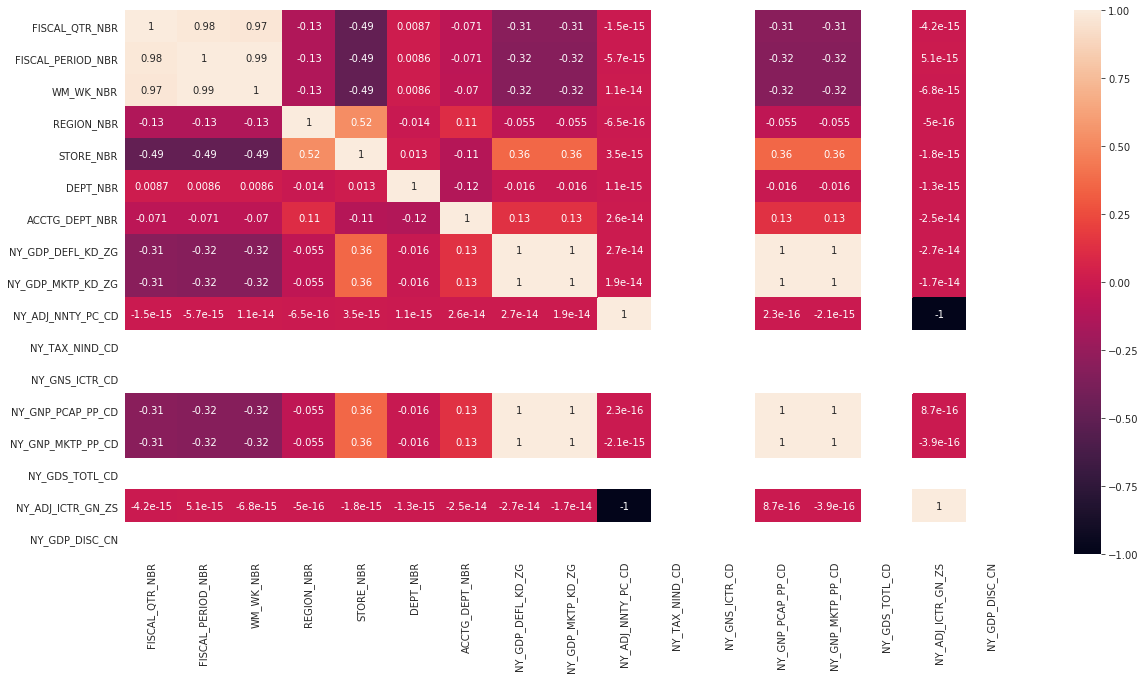

In [0]:
plt.figure(figsize=(20,10))
sns.heatmap(pdf.corr(), annot=True)

In [0]:
pdf.replace([np.inf, -np.inf], np.nan, inplace=True)
pdf.fillna(999, inplace=True)
X=pdf[['FISCAL_QTR_NBR','FISCAL_PERIOD_NBR','WM_WK_NBR','REGION_NBR','STORE_NBR','DEPT_NBR','NY_GDP_DEFL_KD_ZG','NY_GDP_MKTP_KD_ZG','NY_ADJ_NNTY_PC_CD','NY_GNP_PCAP_PP_CD','NY_GNP_MKTP_PP_CD','NY_GDS_TOTL_CD','NY_ADJ_ICTR_GN_ZS','NY_GDP_DISC_CN']]
# X=pdf[['FISCAL_QTR_NBR','FISCAL_PERIOD_NBR','REGION_NBR','STORE_NBR','DEPT_NBR','NY_GDP_DEFL_KD_ZG','NY_GDP_MKTP_KD_ZG','NY_ADJ_NNTY_PC_CD','NY_GNP_PCAP_PP_CD','NY_GNP_MKTP_PP_CD','NY_GDS_TOTL_CD','NY_ADJ_ICTR_GN_ZS','NY_GDP_DISC_CN']]

y=pdf['USD_AMT']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)

In [0]:
def correlation(dt,th):
  col_corr = set()
  corr_mtrx = pdf.corr()
  for i in range(len(corr_mtrx.columns)):
    for j in range(i):
      if abs(corr_mtrx.iloc[i,j]) > th:
        colnm = corr_mtrx.columns[i]
        col_corr.add(colnm)
  return col_corr  
corr_features = correlation(pdf,0.8)
corr_features

Out[832]: {'FISCAL_PERIOD_NBR',
 'NY_ADJ_ICTR_GN_ZS',
 'NY_GDP_MKTP_KD_ZG',
 'NY_GNP_MKTP_PP_CD',
 'NY_GNP_PCAP_PP_CD',
 'WM_WK_NBR'}

In [0]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10, scoring='neg_mean_squared_error')
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [0]:
print("**** Linear Regression Model****")
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)

print(lin_reg.intercept_)
coeff_df = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])
print(coeff_df)
pred = lin_reg.predict(X_test)
plt.scatter(y_test, pred)

test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,10562.495825,1.239427e+09,35205.498516,0.110147,-1.256858e+09


In [0]:
# from sklearn import metrics
# sorted(metrics.SCORERS.keys())

In [0]:
# # plt.plot(X_test)
# # # plt.plot(X_train)
# # # plt.plot(train_pred)
# # plt.plot(test_pred)
# # plt.legend(['X_test','X_train', 'train_pred', 'test_pred'])
# plt.plot(test_pred)
# plt.xlim(0,10,10)
# plt.xlabel('WM_WK_NBR')
# plt.ylabel('USD_AMT')

In [0]:
print("**** Robust Regression Model****Random Sample Consensus - RANSAC****")
from sklearn.linear_model import RANSACRegressor

model = RANSACRegressor(base_estimator=LinearRegression(), max_trials=100)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Robust Regression", *evaluate(y_test, test_pred) , cross_val(RANSACRegressor())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df_2

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Robust Regression,4839.048343,1.366138e+09,36961.307804,0.019174,-1.146808e+09


In [0]:
print("**** Ridge Regression Model****L2")
from sklearn.linear_model import Ridge

model = Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Ridge Regression", *evaluate(y_test, test_pred) , cross_val(Ridge())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df_2


,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Ridge Regression,10535.312515,1.245348e+09,35289.489366,0.105896,-1.254766e+09


In [0]:
print("**** Lasso Regression Model**** L1")
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.1, 
              precompute=True, 
#               warm_start=True, 
              positive=True, 
              selection='random',
              random_state=42)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Lasso Regression", *evaluate(y_test, test_pred) , cross_val(Lasso())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df_2
# plt.plot(test_pred,y_test,)

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Lasso Regression,9297.051258,1.358035e+09,36851.532268,0.024991,-1.256771e+09


In [0]:
print("**** Support Vector Machine ****")
from sklearn.svm import SVR

svm_reg = SVR(kernel='rbf', C=1000000, epsilon=0.001)
svm_reg.fit(X_train, y_train)

test_pred = svm_reg.predict(X_test)
train_pred = svm_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["SVM Regressor", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df_2

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,SVM Regressor,5092.128785,1.417183e+09,37645.494735,-0.017474,0


In [0]:
print("**** Polynomial Regression Model****")

from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)

X_train_2_d = poly_reg.fit_transform(X_train)
X_test_2_d = poly_reg.transform(X_test)

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train_2_d,y_train)

test_pred = lin_reg.predict(X_test_2_d)
train_pred = lin_reg.predict(X_train_2_d)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Polynomail Regression", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df_2

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Polynomail Regression,2.567892e+13,1.150585e+27,3.392028e+13,-8.260688e+17,0


In [0]:
print("**** Stochastic Gradient Descent Regression Model****")
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(n_iter_no_change=250, penalty=None, eta0=0.0001, max_iter=100000)
sgd_reg.fit(X_train, y_train)

test_pred = sgd_reg.predict(X_test)
train_pred = sgd_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Stochastic Gradient Descent", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df_2

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Stochastic Gradient Descent,2.087681e+32,4.362703e+64,2.088708e+32,-3.132225e+55,0


In [0]:
print("**** Random Forest Regressor ****")
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=1000)
rf_reg.fit(X_train, y_train)

test_pred = rf_reg.predict(X_test)
train_pred = rf_reg.predict(X_train)


print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Random Forest Regressor", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df_2

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Random Forest Regressor,578.204767,2.607405e+07,5106.275425,0.98128,0


In [0]:
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,1.056250e+04,1.239427e+09,3.520550e+04,1.101469e-01,-1.256858e+09
1,Robust Regression,4.839048e+03,1.366138e+09,3.696131e+04,1.917392e-02,-1.146808e+09
2,Ridge Regression,1.053531e+04,1.245348e+09,3.528949e+04,1.058959e-01,-1.254766e+09
3,Lasso Regression,9.297051e+03,1.358035e+09,3.685153e+04,2.499140e-02,-1.256771e+09
4,SVM Regressor,5.092129e+03,1.417183e+09,3.764549e+04,-1.747410e-02,0.000000e+00
5,Polynomail Regression,2.567892e+13,1.150585e+27,3.392028e+13,-8.260688e+17,0.000000e+00
6,Stochastic Gradient Descent,2.087681e+32,4.362703e+64,2.088708e+32,-3.132225e+55,0.000000e+00
7,Random Forest Regressor,5.782048e+02,2.607405e+07,5.106275e+03,9.812800e-01,0.000000e+00


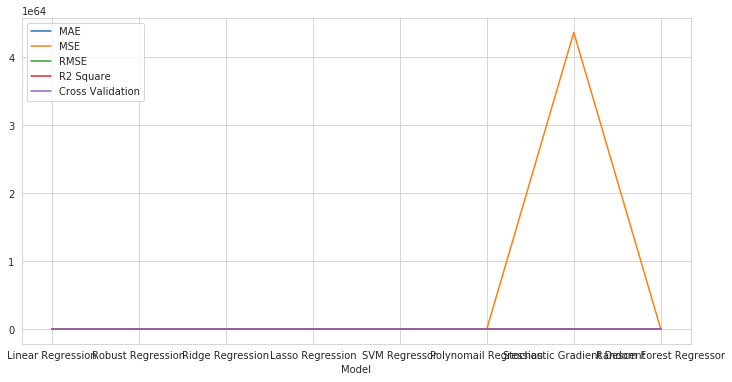

In [0]:
results_df.plot(x='Model',figsize=(12,6))

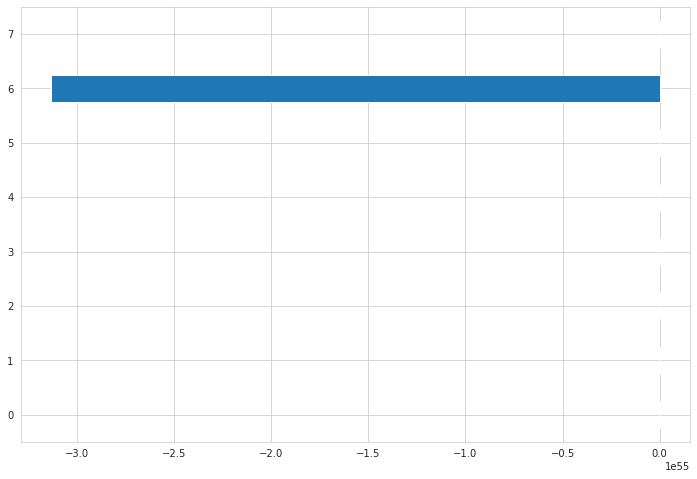

In [0]:
print("**** Models Comparison ****")
# results_df.set_index('Model', inplace=True)
results_df['R2 Square'].plot(kind='barh', figsize=(12, 8))


In [0]:
results_df=results_df.drop(index=[5,6])
results_df 
# = results_df.set_index("Model")


,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,10562.495825,1.239427e+09,35205.498516,0.110147,-1.256858e+09
1,Robust Regression,4839.048343,1.366138e+09,36961.307804,0.019174,-1.146808e+09
2,Ridge Regression,10535.312515,1.245348e+09,35289.489366,0.105896,-1.254766e+09
3,Lasso Regression,9297.051258,1.358035e+09,36851.532268,0.024991,-1.256771e+09
4,SVM Regressor,5092.128785,1.417183e+09,37645.494735,-0.017474,0.000000e+00
7,Random Forest Regressor,578.204767,2.607405e+07,5106.275425,0.981280,0.000000e+00


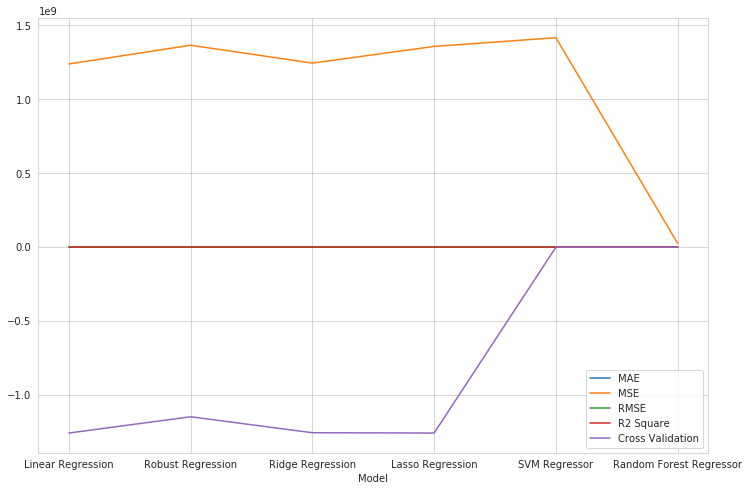

In [0]:
# results_df['MAE','Model'].plot(kind='barh', figsize=(12, 8),xlabel='MAE',ylabel='Model',title='MAE HIST')
# # df.plot(xlabel='X Label', ylabel='Y Label', title='Plot Title')
results_df.plot(x='Model',figsize=(12,8))

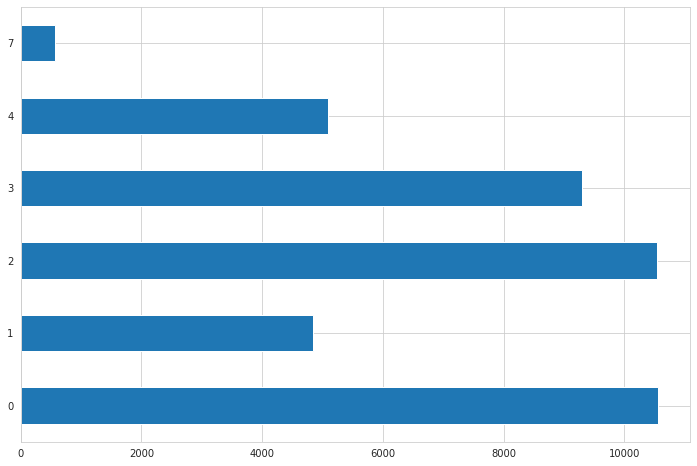

In [0]:
results_df['MAE'].plot(x='Model',kind='barh', figsize=(12, 8))

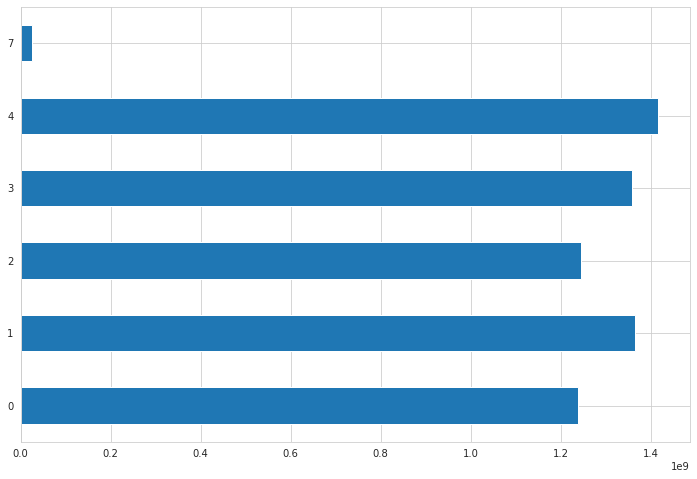

In [0]:
results_df['MSE'].plot(kind='barh', figsize=(12, 8))

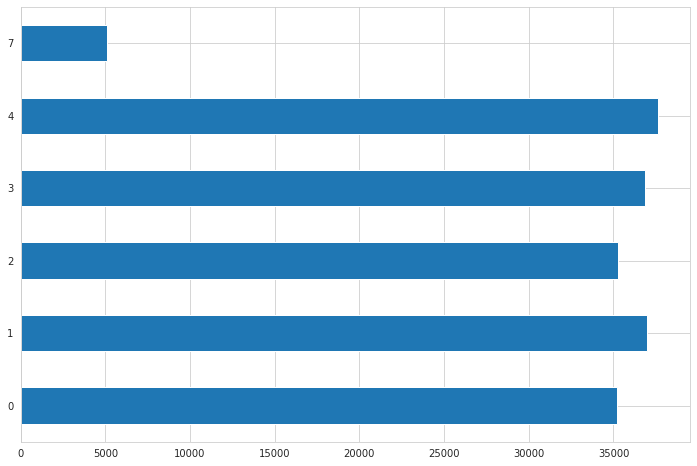

In [0]:
results_df['RMSE'].plot(kind='barh', figsize=(12, 8))